In [1]:
# imports
import numpy as np
import pandas as pd

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import confusion_matrix

## Question 1

In [2]:
# import py script
from tp_knn_source import *

In [49]:
# inspect rand functions

DICT_RAND_FUNC = {
    "rand_bi_gauss": {
        "func": rand_bi_gauss
    },
    "rand_tri_gauss": {
        "func": rand_tri_gauss
    },
    "rand_clown": {
        "func": rand_clown
    },
    "rand_checkers": {
        "func": rand_checkers
    }
}


In [78]:

fig = make_subplots(
    rows=1, cols=4,
    subplot_titles=list(DICT_RAND_FUNC.keys())
)

for i, (rand_func_name, rand_func_props ) in enumerate(DICT_RAND_FUNC.items()):
    # sample from ...
    output_X, output_y = rand_func_props["func"]()

    # plot
    fig.add_trace(
        go.Scatter(
            x=output_X[:, 0],
            y=output_X[:, 1],
            marker_color=output_y,
            mode="markers",
            showlegend=False
        ),
        row=1, col=i+1
    )

    # update layout
    fig.update_xaxes(title="x_1", row=1, col=i+1)
    fig.update_yaxes(title="x_2", row=1, col=i+1)

fig.show()

- ``rand_bi_gauss`` *(resp ``rand_tri_gauss``)* samples points from **two** *(resp **three**)* bi-dimensional normal distributions
- Also, they both assign every bi-dimensional normal to a distinct class

On the other hand,

- both ``rand_clown`` and ``rand_checkers`` generate random samples. Indeed, when executing this function multiple times, it yield completly different data
- Also, the labels are assigned at random


Taking on account the shape of the data, we see that it will be relativaly easy to classify ``rand_bi_gauss`` and ``rand_tri_gauss`` compared to data sets generated using ``rand_clown`` and ``rand_checkers``. Indeed, the latter classes overlap whereas the former the classes are distinct.

## Question 2

- To adapt the $k-NN$ algorithm for regression
    1. we determine the $V_k(x)$
    2. the prediction of $x$ will be the mean or median over $V_k(x)$

## Question 3

In [ ]:
#

In [ ]:
# Write your own implementation
from scipy.spatial.distance import cdist
from sklearn.base import BaseEstimator, ClassifierMixin
from scipy import stats
import numpy as np


class KNNClassifier(BaseEstimator, ClassifierMixin):
    """ Home made KNN Classifier class"""
    def __init__(self, n_neighbors=1):
        self.n_neighbors = n_neighbors

    def fit(self, X, y):
        # no work is done at fit time, except storing training data
        self.X_ = X
        self.y_ = y
        return self

    def predict(self, X):
        n_samples, n_features = X.shape
        #  Compute all pairwise distances between X and self.X_
        D = cdist(X, self.X_)

        # sort the distance matrix D 
        D_sorted = np.argsort(D, axis=1)
    
        # compute mask of element to keep
        idx = D_sorted < self.n_neighbors
        
        # slect y_label of element that satisfy mask row-wise 
        Y_neighbors = [self.y_[idx[row_id, :]] for row_id in range(n_samples)]
        Y_neighbors = np.array(Y_neighbors)

        # compute the most frequent label in Y_neighbors
        y_pred = stats.mode(Y_neighbors,axis=1).mode

        return y_pred.ravel()

# test 
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
y = np.array([3, 2, 0, 2])
knn = KNNClassifier(n_neighbors=2)
knn.fit(X, y)
knn.predict(np.array([[1, 2], [3.1, 4], [1, 2.1], ]))

array([2, 0, 2])

In [ ]:

X1, y1 = rand_bi_gauss()

# Focus on dataset 2
X_train = X1[::2]
Y_train = y1[::2]
X_test = X1[1::2]
Y_test = y1[1::2]



# your classifier
n_neighbors = 1
knn = KNNClassifier(n_neighbors=n_neighbors)

Y_pred = knn.fit(X_train, Y_train).predict(X_test)

sknn = KNeighborsClassifier(n_neighbors=n_neighbors)

Y_pred_skl = sknn.fit(X_train, Y_train).predict(X_test)

# score classification
print(accuracy_score(Y_test, Y_pred))
print(accuracy_score(Y_test, Y_pred_skl))

0.41
1.0


## Question 4 

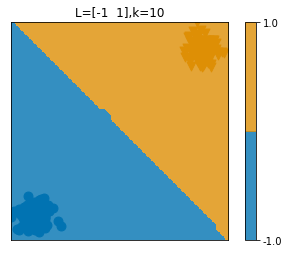

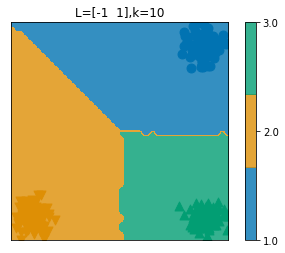

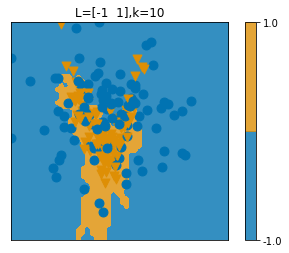

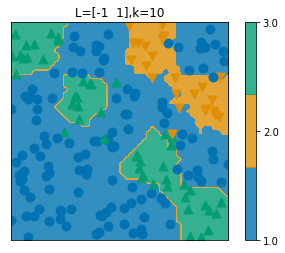

In [18]:
# test now for all datasets

n_neighbors = 10
knn = neighbors.KNeighborsClassifier(n_neighbors)


# TODO something like:
for rand_sampler in [rand_bi_gauss, rand_tri_gauss, rand_clown, rand_checkers]:
    # sample data
    X, y = rand_sampler()

    # fit model
    knn.fit(X, y)
    
    plt.figure()
    #todo plot
    n_labels = np.array([-1, 1])
    frontiere_new(knn, X, y, w=None, step=50, alpha_choice=1,
                  n_labels=n_labels, n_neighbors=n_neighbors)

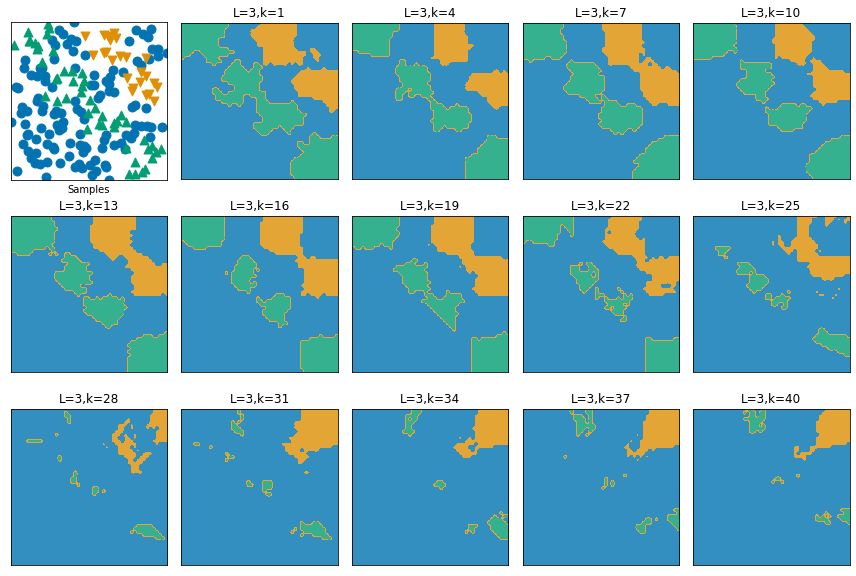

In [36]:
# Display the predictions when varying the value of k

X_train, y_train = rand_checkers()

plt.figure(3, figsize=(12, 8))
plt.subplot(3, 5, 1)
plot_2d(X_train, y_train)
plt.xlabel('Samples')

ax = plt.gca()
ax.get_yaxis().set_ticks([])
ax.get_xaxis().set_ticks([])

for i, n_neighbors in enumerate(np.arange(1, 40 + 4, 3)[:14]):
    # TODO 
    plt.subplot(3, 5, i + 2)
    
    # init model
    knn = neighbors.KNeighborsClassifier(n_neighbors)

    # train model
    knn.fit(X_train, y_train)
    

    frontiere_new(knn, X_train, y_train, w=None, step=50, alpha_choice=1,
                  colorbar=False, samples=False, n_neighbors=n_neighbors)
    plt.draw()

plt.tight_layout()

- When the number of neighbors is small, we notice that the decision boundary is sharpe (complicated).
On the other hand, the frontiere get smooth (simple) as we increase the number of neighbors.
- Also, we observe that when we increase the number of neighbors, the abundant class dominate the others (in the above case, the blue class dominates the others)

## Question 5

In [38]:
# fraction of errors for k=1

# sample data and split train / test
X, y = rand_checkers()

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=.2,
    random_state=123654789
)

# init model
knn = neighbors.KNeighborsClassifier(n_neighbors=1)

# fit model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [47]:
DICT_DATA = {
    "train": {"X": X_train, "y": y_train},
    "test": {"X": X_test, "y": y_test}
}

for data_type, Xy in DICT_DATA.items():
    # explode 
    X, y = Xy.values()

    frac_error = 1 - accuracy_score(y, knn.predict(X))

    print(f"The {data_type} fraction error: {frac_error:.3f}")

The train fraction error: 0.000
The test fraction error: 0.205


- the training error is ``null``. In fact, in this case, the model assigns to each data point its actual class
- Another remark illustrated by the latter results, having a training error equal to 0 doesn't mean that the model is perfect. The testing phase is mandatory when building predictive models

## Question 6

In [85]:
# function to compute error
def compute_error(knn, X, y_true):
    y_predicted = knn.predict(X)

    return 1 - accuracy_score(y_true, y_predicted)

In [106]:
# params
range_n = [100, 500, 1000]
range_k = np.arange(1, int(1000 * (1-0.2)) - 1, 2)

dict_error = {"train": {}, "test": {}}

for n in range_n: 
    # where to store current n
    for error_type in dict_error:
        dict_error[error_type][n] = []

    # sample data and split train / test
    X, y = rand_checkers(n1=n//2, n2=n//2)

    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=.2,
        random_state=123654789
    )

    # organize data
    dict_data = {
        "train": {"X": X_train, "y": y_train},
        "test": {"X": X_test, "y": y_test}
    }

    for error_type in dict_data:
        for k in range_k:
            try:
                # init / fit model
                knn = neighbors.KNeighborsClassifier(n_neighbors=k)
                knn.fit(X_train, y_train)

                # compute error
                Xy = dict_data[error_type]
                error = compute_error(knn, Xy["X"], Xy["y"])

                dict_error[error_type][n].append(error)
            except:
                continue

In [108]:
# plot

# params
arr_colors = ['#636EFA', '#EF553B', '#00CC96']
dict_colors_n = {n: color for n, color in zip(range_n, arr_colors)}


fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=[f"{type_error} error" for type_error in dict_error]
)

for i, (type_error, error_ns) in enumerate(dict_error.items()):
    for n in error_ns:
        # plot trace
        fig.add_trace(
            go.Scatter(
                x=range_k,
                y=error_ns[n],
                name=f"nb samples={n}",
                mode="markers+lines",
                marker_color=dict_colors_n[n],
                showlegend=True if type_error == "train" else False
            ),
            row=1, col=i+1
        )

        # update layout
        fig.update_xaxes(title="nb neighbors", type="log")
        fig.update_yaxes(range=[0, 1])


fig.show()

- For the train:
    - The more we increase the number of neighbors, the more we increase the training error
    - All error curves $(n=100, n=500, n=1000)$ have a horizontal asymptot for $n \rightarrow \infty$
- For the test:
    - we notice an decreasing then increasing pattern of the error curves, with a horizontal asymptot for $n \rightarrow \infty$


**Interpretation**: When the number of neighbors becomes big, the model behave like a base model that always predicts the label of the most abundant class

**Best $k$**: According to the curves of test error, the best $k$ is $10$. Indeed, it is the one that minimizes the test error



## Question 7

Pros and Cons of $k-NN$

- **Pros**: 
    - $k-NN$ is easy to implement and intuitive to understand
    - desipte its simplicity, it acheives good performance (e.g. $0.11$ in the previous example)
- **Cons**:
    - $k-NN$ is not scalable for huge datasets since it relies on the entire data to make a prediction. Hence it requires constantly compute pairwise distances between data points (which is a big costly: $O(n^2)$ for a naive implementation)

Pros and Cons of the procedure to select $k$

- **Pros**: selecting the best $k$ based on the test error is fast fast procedure
- **Cons**: it is not a procedure to trust since it relies on only *one experiment*. A better way to select $k$ is by applying cross validation, which is a more robust procedure. However, it is computionaly coslty to apply since it requires to run and evaluate the model many times (with number of folds equal 5: number of times is $C^1_5$)


## Question 8 and 9

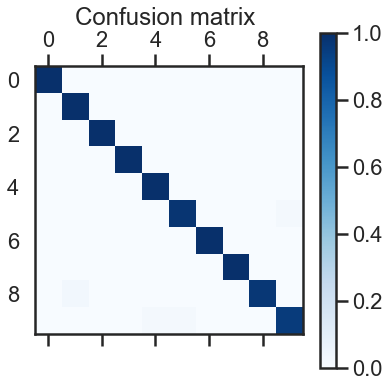

In [ ]:
# test k-NN on digits dataset

# The digits dataset
digits = datasets.load_digits()

digits['data'].shape , digits['target'].shape

# split into training and test
X_train, X_test, y_train, y_test = train_test_split(digits['data'], digits['target']) 
# fit a knn classifier
n_neighbors = 1
knn = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)
knn.fit(X_train, y_train)

# compute the confusion matrix on the test set
y_pred = knn.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
# normalize the confusion matrix by row 
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
# plot the confusion matrix 
import matplotlib.pyplot as plt
plt.matshow(conf_matrix_normalized, cmap=plt.cm.Blues)
plt.colorbar()
plt.title('Confusion matrix ')
plt.show()

## Question 10

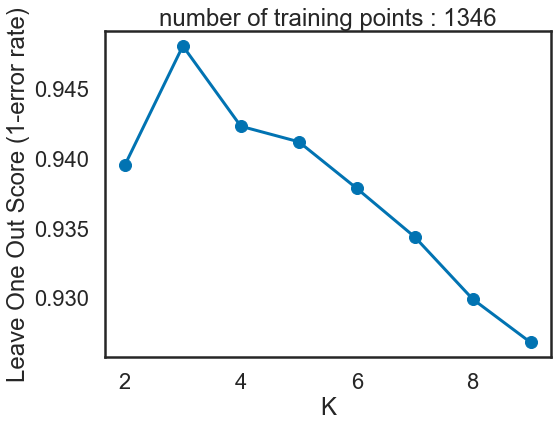

In [ ]:
# Estimate k with cross-validation

# Have a look at the class 'LOOCurve', defined in the source file.
# LOO stands for Leave One Out


loo_curve = LOOCurve(k_range = list(range(2, 10)))
loo_curve.fit_curve(X_train, y_train)
loo_curve.plot()
# we can see that k = 3 give the best score . 


## Question 11

In [ ]:
# Implement weights for the kNN classifier


def weights_func(dist):
    """Returns an array of weights, exponentially decreasing in the square
    of the distance.

    Parameters
    ----------
    dist : a one-dimensional array of distances.

    Returns
    -------
    weight : array of the same size as dist
    """
    #  use weights equal to exp(- dist^2 / 0.1)
    def f(x):
        return np.exp(- x**2 / 0.1)
    vf = np.vectorize(f)
    return vf(dist) 
 
# test 
weights_func(np.array([1, 2, 3]))

array([4.53999298e-05, 4.24835426e-18, 8.19401262e-40])

In [ ]:
# Write your own implementation
from scipy.spatial.distance import cdist
from sklearn.base import BaseEstimator, ClassifierMixin
from scipy import stats
import numpy as np 
from sklearn.utils.extmath import weighted_mode
class KNNClassifier(BaseEstimator, ClassifierMixin):
    """ Home made KNN Classifier class"""
    def __init__(self, n_neighbors=1, use_weights=False):
        self.n_neighbors = n_neighbors
        self.use_weights = use_weights

    def fit(self, X, y):
        # no work is done at fit time, except storing training data
        self.X_ = X
        self.y_ = y
        return self

    def predict(self, X):
        n_samples, n_features = X.shape
        #  Compute all pairwise distances between X and self.X_
        D = cdist(X, self.X_)

        # sort the distance matrix D 
        D_sorted = np.argsort(D, axis=1)
        
        # compute mask of element to keep
        idx =D_sorted <self.n_neighbors
        
        # slect y_label of element that satisfy mask row-wise 
        Y_neighbors = [ self.y_[idx[row_id,:]] for row_id in range(X.shape[0]) ]
        Y_neighbors = np.array(Y_neighbors)
        #print(Y_neighbors)
        if self.use_weights:
            # compute weighted D 
           
            weights_D =  [weights_func(D[row_id]) for row_id in range(D.shape[0]) ]
            weights_D = np.array(weights_D)

            weights_D_masked = weights_D[idx].reshape(n_samples, self.n_neighbors)
            #print(weights_D_masked)
            # compute weighted y_label
            y_labels = [weighted_mode(neighbors, weights_)[0] for neighbors,weights_ 
                        in zip(Y_neighbors, weights_D_masked)]
            y_labels = np.array(y_labels)
       
            return y_labels.ravel()
        else :
            # return the most frequent label
            y_labels =  stats.mode(Y_neighbors, axis=1).mode
            return y_labels.ravel()

# test 
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
y = np.array([3, 2, 0, 2])
knn = KNNClassifier(n_neighbors=2, use_weights=True)
knn.fit(X, y)
a = knn.predict(np.array([[1, 2], [3.1, 4], [1, 2.1], ]))
a

array([3., 0., 3.])

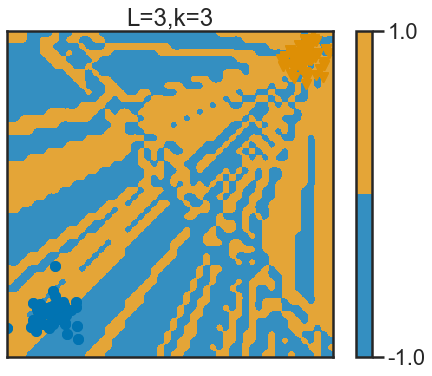

[ 1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1. -1. -1.  1. -1. -1.  1.
 -1.  1. -1.  1.  1.  1. -1.  1. -1. -1. -1. -1.  1. -1.  1.  1. -1. -1.
  1.  1.  1. -1.  1.  1.  1.  1. -1.  1.  1.  1. -1.  1. -1. -1.  1. -1.
  1.  1. -1.  1. -1.  1. -1. -1. -1.  1. -1. -1.  1.  1. -1. -1. -1. -1.
  1.  1.  1. -1. -1.  1. -1.  1. -1. -1.  1. -1. -1. -1.  1.  1.  1.  1.
  1. -1.  1.  1.  1. -1. -1.  1.  1. -1.]


In [ ]:

n_neighbors = 5
wknn =KNNClassifier(n_neighbors, use_weights=True)
wknn.fit(X_train, Y_train)
plt.figure(4)
plot_2d(X_train, Y_train)


frontiere_new(knn, X_train, Y_train, w=None, step=50, alpha_choice=1)
plt.show()

print(wknn.predict(X_train))